<h1><u><b>PREDICT FLIGHT DELAYS<u><b><h1>  

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

<h2><u><b>Data cleaning & preparation</b></u></h2>

In [9]:
#import the dataset
dataset = pd.read_csv('airlines_delay.csv')

In [10]:
#Look at first 5 rows
dataset.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [11]:
#set Flight column as index
dataset.set_index('Flight',inplace=True)
dataset.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
2313.0,1296.0,141.0,DL,ATL,HOU,1,0
6948.0,360.0,146.0,OO,COS,ORD,4,0
1247.0,1170.0,143.0,B6,BOS,CLT,3,0
31.0,1410.0,344.0,US,OGG,PHX,6,0
563.0,692.0,98.0,FL,BMI,ATL,4,0


**We have the following features:<br/>
Numerical:** Time, and Length<br/>
**Categorical:** Time, Airline, AirportFrom, AirportTo, and DayOfWeek<br/>
**Note: we have assumed Time to be a numerical variable rather than a categorical one. We could have done the opposite as well, i.e. for this problem I do not see one as better than the other.**

In [13]:
#Let's look at the columns and their data type
dataset.dtypes

Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [14]:
#collecting statistical informations of columns
dataset.describe(include='all')

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
count,539382.000000,539382.000000,539382,539382,539382,539382.000000,539382.000000
unique,NaN,NaN,18,293,293,NaN,NaN
top,NaN,NaN,WN,ATL,ATL,NaN,NaN
freq,NaN,NaN,94097,34449,34440,NaN,NaN
mean,802.728161,132.202104,NaN,NaN,NaN,3.929666,0.445443
std,278.045546,70.117045,NaN,NaN,NaN,1.914666,0.497015
min,10.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000
25%,565.000000,81.000000,NaN,NaN,NaN,2.000000,0.000000
50%,795.000000,115.000000,NaN,NaN,NaN,4.000000,0.000000
75%,1035.000000,162.000000,NaN,NaN,NaN,5.000000,1.000000


<AxesSubplot:>

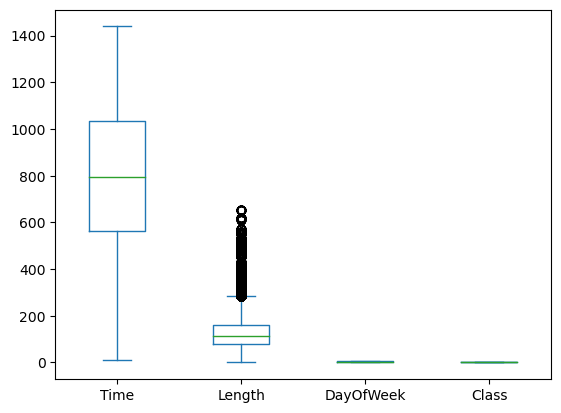

In [16]:
#check for Outliers
dataset.plot(kind='box')
#length has some outliers

In [17]:
#change categorical columns to be a category data type
for col in dataset.columns:
    if col in ['Time','Length','Class']:
        next
    else:
        dataset[col] = dataset[col].astype('category')
dataset.dtypes

Time            float64
Length          float64
Airline        category
AirportFrom    category
AirportTo      category
DayOfWeek      category
Class             int64
dtype: object

In [18]:
#Let's see the size of our dataset
dataset.shape

(539382, 7)

In [19]:
# Count the number of instances in each class
class_counts = dataset['Class'].value_counts()

# Print the class distribution 
print('Class distribution:')
print(class_counts)

Class distribution:
0    299118
1    240264
Name: Class, dtype: int64


In [20]:

dataset['Class'].value_counts()/dataset['Class'].value_counts().sum()
#The target variable, that is 'classes' are almost balanced

0    0.554557
1    0.445443
Name: Class, dtype: float64

**We have 539382 rows and 7 columns**

In [21]:
#Let's see how many NaN values there are throughout our dataset
dataset.isnull().sum()

Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

**We have no missing data! We will now move onto EDA.**

<h1><u><b>Exploratory Data Analysis</b></u></h1>

In [22]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

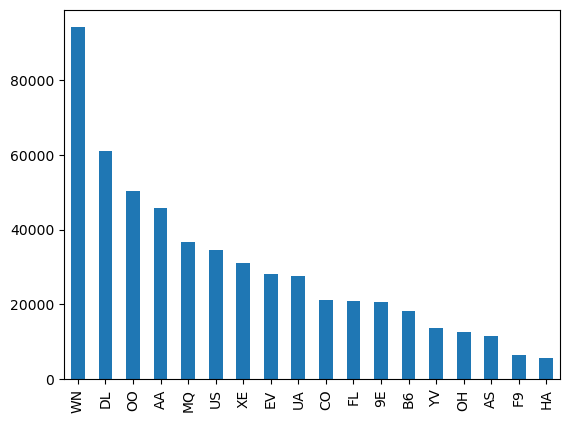

In [17]:
#Total value of flights per airline
dataset['Airline'].value_counts().plot.bar()

### WN airline has the most flights and HA airline has the least

<AxesSubplot:xlabel='Airline', ylabel='count'>

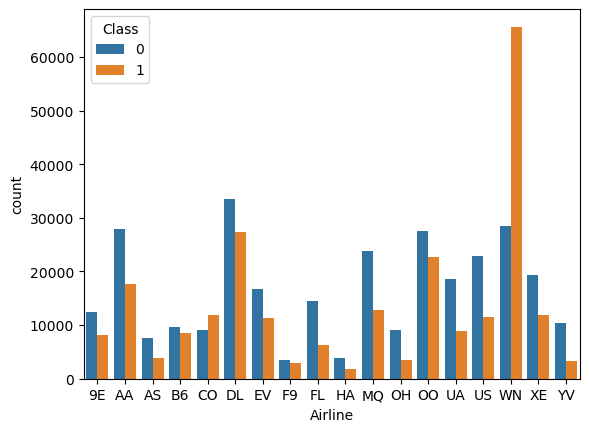

In [23]:
#check for total number of delayed flights and flights arrived on time
sns.countplot(x=dataset['Airline'],hue='Class',data=dataset)


--- 1 represents delayed flights while 0 represents flights arrived on time
### WN airline has the highest delay

<AxesSubplot:xlabel='Airline', ylabel='Length'>

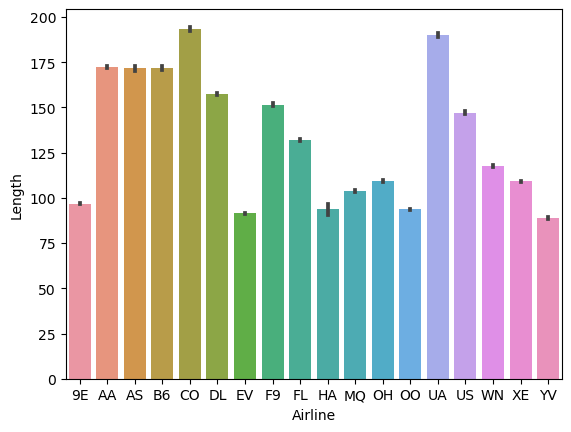

In [24]:
#Airline and travel time
sns.barplot(x = 'Airline', y = 'Length', data = dataset)

### CO and UA has the longest average flight length



<AxesSubplot:xlabel='Airline', ylabel='Time'>

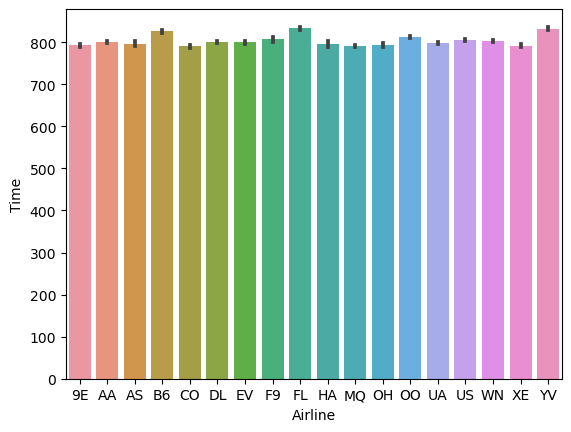

In [26]:
#flight departure times
sns.barplot(x = 'Airline', y = 'Time', data = dataset)

### Almost all of the flights have similar departure times

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

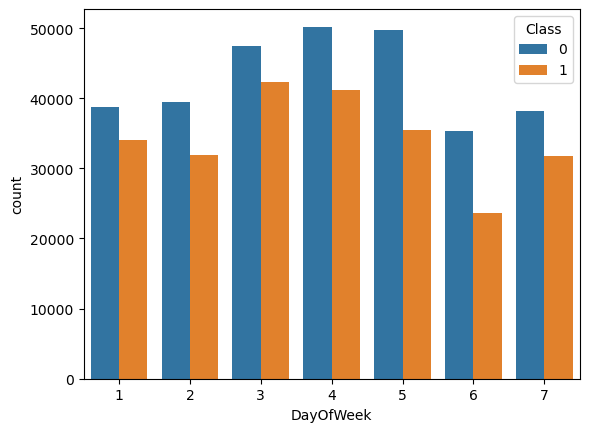

In [27]:
#delayed flights per day
sns.countplot(x=dataset['DayOfWeek'],hue='Class',data=dataset)


### There has been more delays in the midweek than weekends 
### Highest delay has been in Wednesday --
### The lowest delay has been in Saturday

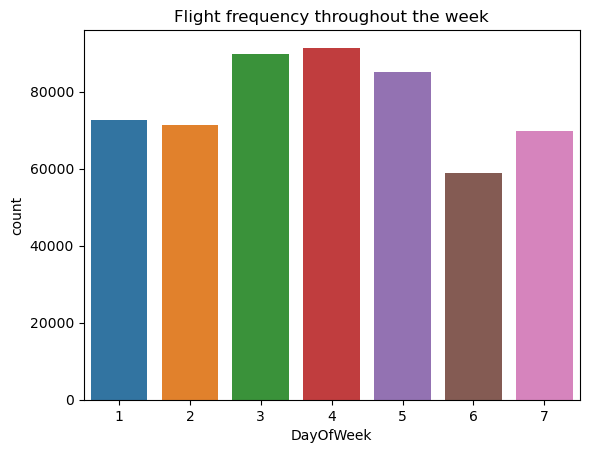

In [29]:
#Flight frequency throughout the week
DayOfWeekOrder = list(range(1,8))
sns.countplot(x='DayOfWeek',data=dataset,order=DayOfWeekOrder).set(title='Flight frequency throughout the week');

**We see that the middle days of the week is when the most flights are booked. Saturday has the least number of flights, while Thursday has the most. This can be explained by people wanting to fly to a new place and have a whole weekend to themselves.**

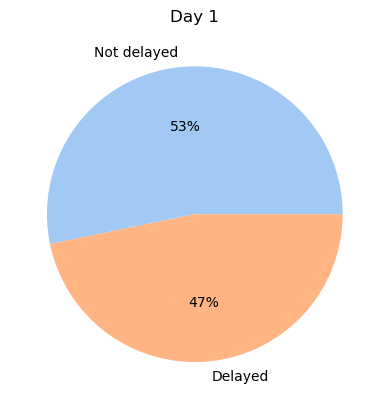

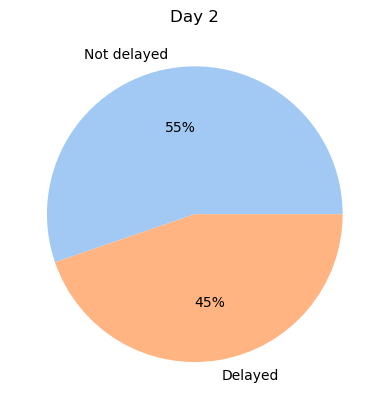

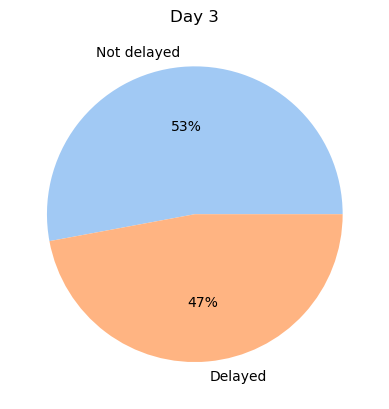

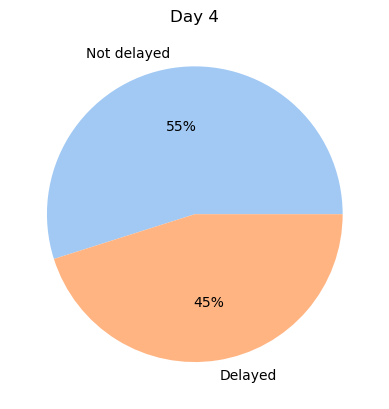

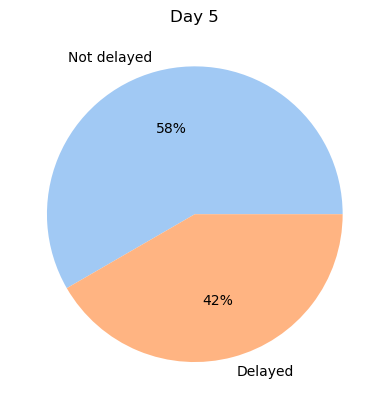

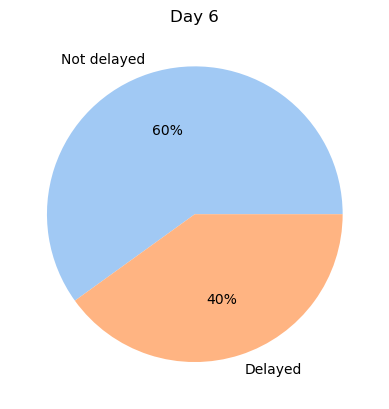

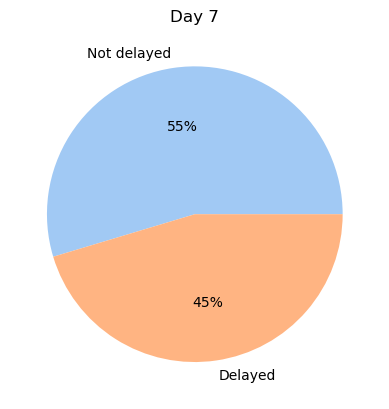

In [30]:
#Day of week vs Flight being delayed
a = dataset.groupby(['DayOfWeek','Class']).count().unstack('Class')['Time']
for i in range(a.shape[0]):
    numOfFlights = a.iloc[i,0]+a.iloc[i,1]
    for j in [0,1]:
        a.iloc[i,j] = a.iloc[i,j]/numOfFlights

#set labels for pie chart
pieChartLabels = ['Not delayed','Delayed']
#define Seaborn color palette to use
myColors = sns.color_palette('pastel')[0:5]
#display pie charts for the whole week   
for i in range(1,8):
    b = a.iloc[i-1,:]
    #create pie chart
    plt.pie(b, labels = pieChartLabels, colors = myColors, autopct='%.0f%%')
    plt.title('Day ' + str(i))
    plt.show()

**We see that on days 5 and 6 we have the percentage of flights being the least delayed, and on days 1 and 3 we have it being the most delayed.**

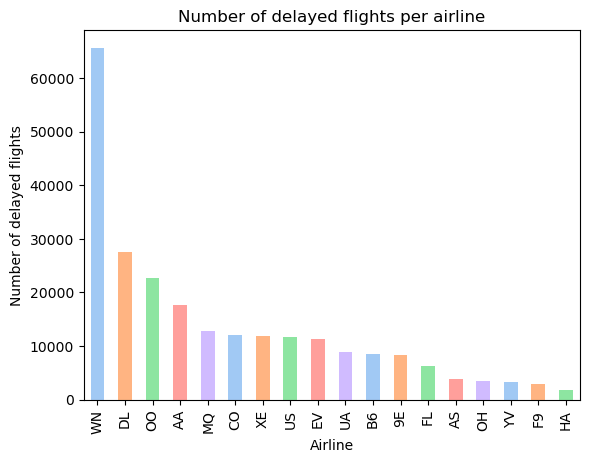

In [31]:
#We will now look at which airlines had the most delayed flights
c = dataset.groupby('Airline').sum()['Class'].sort_values(ascending=False)
c.plot(kind='bar',color=myColors)
plt.ylabel('Number of delayed flights')
plt.title('Number of delayed flights per airline')
plt.show()

**We see that airline WN has the most number of delayed flights by a big margin.**

<AxesSubplot:xlabel='Class', ylabel='count'>

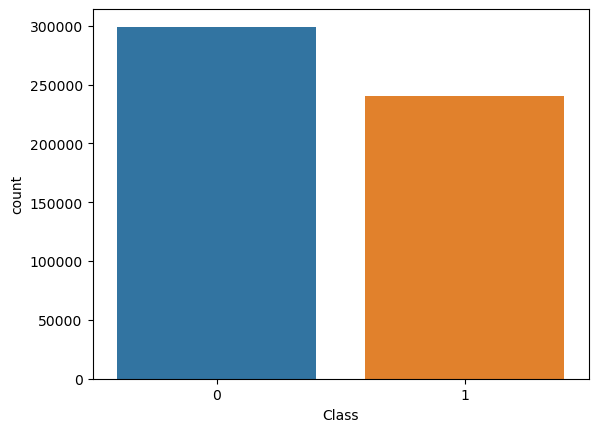

In [32]:
#Visualizing the splitting of 'Class' column
sns.countplot(x = 'Class', data = dataset)

**We will now move onto modelling.**

<h1><u><b>Model creation and prediction</b></u></h1>

In [33]:
#We need to standardize the features: Time, and Length
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dataset[['Time','Length']] = sc.fit_transform(dataset[['Time','Length']])
dataset.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
Flight,,,,,,,
2313.0,0.899930,0.215267,DL,ATL,HOU,1,0
6948.0,0.244927,0.222901,OO,COS,ORD,4,0
1247.0,0.811756,0.218321,B6,BOS,CLT,3,0
31.0,0.979706,0.525191,US,OGG,PHX,6,0
563.0,0.477257,0.149618,FL,BMI,ATL,4,0


In [34]:
#We now need to encode our categorical features
categorical_features = ['Airline','AirportFrom','AirportTo','DayOfWeek']
dataset = pd.get_dummies(data=dataset,columns=categorical_features,drop_first=True)
dataset.head()

,Time,Length,Class,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,...,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
Flight,,,,,,,,,,,,,,,,,,,,,
2313.0,0.899930,0.215267,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6948.0,0.244927,0.222901,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1247.0,0.811756,0.218321,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31.0,0.979706,0.525191,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
563.0,0.477257,0.149618,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
#Let's create our independent (X) variable and our dependent (y) variable
#X = dataset.iloc[:,0:-1].values
#y = dataset.iloc[:,-1].values

In [37]:
#Let's move our Class column to the end of the DataFrame
transportedColumn = dataset.pop('Class')
dataset = pd.concat([dataset,transportedColumn],axis=1)
dataset.head()

,Time,Length,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,...,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Class
Flight,,,,,,,,,,,,,,,,,,,,,
2313.0,0.899930,0.215267,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6948.0,0.244927,0.222901,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1247.0,0.811756,0.218321,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31.0,0.979706,0.525191,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
563.0,0.477257,0.149618,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Splitting the dataset into the Training set and the Test set
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

**We will try multiple machine learning model algorithms to find the best one for this problem.**

<h3><u><b>LOGISTIC REGRESSION<b><u><h3>

In [ ]:

X=dataset.drop('Class',axis=1)
y=dataset['Class']

#Splitting the training and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


#importing LogisticRegression model building library
from sklearn.linear_model import LogisticRegression


In [ ]:
print('X_train shape is',X_train.shape)
print('X_test shape is',X_test.shape)
print('y_train shape is',y_train.shape)
print('y_test shape is',y_test.shape)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)
model.score(X_test,y_test)

<h3><u><b> KNN</b></u></h3>

In [ ]:
#import model and fit it to training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);

In [ ]:
# Predicting the Test set results
print("The model's accuracy on the training set is: " + str(knn.score(X_train,y_train)*100)+ "%")
print("The model's accuracy on the test set is: " + str(knn.score(X_test,y_test)*100)+ "%")

#I have commented out this code as it takes too long to run considering we will not use this model.

#The training set accuracy was 72% and the test set accuracy was 62%

**We can see that the KNN model overfitted quite substantially, and the accuracy is not that good. The model was also very computationally expensive, so we will not bother with tuning it, and we will move onto the next model.**

<h3><u><b> Random Forest</b></u></h3>

In [ ]:
#import model and fit it to training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(X_train,y_train);

In [ ]:
# Predicting the Test set results
print("The model's accuracy on the training set is: " + str(rf.score(X_train,y_train)*100)+ "%")
print("The model's accuracy on the test set is: " + str(rf.score(X_test,y_test)*100)+ "%")

**This model was far less computationally expensive, and while the training set accuracy improved, the model overfitted even more than the KNN model.**

<h3><u><b>ANN (Artificial Neural Network)</b></u></h3>

In [ ]:
#Import the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
#Create ANN
ann = keras.models.Sequential()
#Add the input layer
ann.add(Dense(units=305, activation='relu', input_shape=X_train[0].shape)) #units equal to (num of IVs + num of DVs)/2. This is a good starting point
#Add second layer (first hidden layer)
ann.add(Dense(units=153, activation='relu')) #units are about half of the first layer
#Add the output layer
ann.add(Dense(units=1, activation='sigmoid'));

In [ ]:
#Run the model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

**We see that there is no large improvement throughout the epochs. The model starts to overfit very soon into the training. The accuracy is not that high either. We will now tune the hyperparameters to achieve better results.**

In [ ]:
#Create ANN
ann = keras.models.Sequential()
ann.add(Dense(units=305, activation='LeakyReLU', input_shape=X_train[0].shape))
ann.add(Dropout(0.1))
ann.add(Dense(units=153, activation='LeakyReLU'))
ann.add(Dropout(0.1))
ann.add(Dense(units=1, activation='sigmoid'))
#Run the model
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
hist = ann.fit(X_train, y_train, batch_size = 32, epochs = 20)

In [ ]:
#create and set training accuracy variable
annTrainingAcc = hist.history['accuracy'][0]*100

In [ ]:
#Prediction on test set
y_pred = ann.predict(X_test)
#We will use a 50% threshold
y_pred = (y_pred > 0.5)

In [ ]:
#Now let's create our Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
annTestAcc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]) * 100
print("The ANN has a training accuracy of " + str(annTrainingAcc) + "%, and a test accuracy of " + str(annTestAcc) + "%")

**We have a model that does not overfit or underfit - this is good. However, despite tuning the model, its accuracy remains low. I am open to any comments on how to improve my models. Thanks!**